# 🌊 GEV Analysis: Better than Gumbel!

## Simple Tutorial for Water Resources Students

---

**Course:** Advanced Water Resources Engineering  
**Instructor:** Dr. Rocky Talchabhadel  
**TA:** Saurav Bhattarai  
**Institution:** Jackson State University  

---

## 🎯 What You'll Learn (Simple!)

1. **GEV = Gumbel + Flexibility** 🔧
2. **One shape parameter controls everything** 🎛️
3. **Three types: Heavy, Medium, Light tails** 📊
4. **When to use GEV vs Gumbel** 🤔
5. **Calculate design events with Python** 💻

**Time needed:** ~1 hour  
**Difficulty:** Intermediate  
**Prerequisites:** Basic understanding of Gumbel distribution  

Let's make extreme value analysis simple! 🚀

---

# 🔧 Setup (Run This First!)

In [ ]:
# Install packages if needed (uncomment if required)
# !pip install numpy pandas matplotlib plotly scipy

# Import everything we need
import numpy as np              # Numbers and calculations
import pandas as pd             # Data tables (like Excel)
import matplotlib.pyplot as plt # Basic plots
import plotly.express as px    # Interactive plots
import plotly.graph_objects as go # Advanced interactive plots
import scipy.stats as stats    # Statistical distributions

# Make plots look nice
import warnings
warnings.filterwarnings('ignore')  # Hide technical warnings

print("✅ Ready to go! All libraries loaded.")
print("🎯 Let's learn GEV analysis!")

---

# 📊 Part 1: Create Sample Data

First, let's create some **realistic flood data** to work with. In real life, you'd load this from an Excel file.

In [16]:
# Create 50 years of flood data (like real engineering projects)
np.random.seed(42)  # Makes results repeatable

# Years from 1974 to 2023
years = list(range(1974, 2024))

# Realistic flood flows (m³/s) - based on real patterns
flood_flows = [
    334, 203, 197, 183, 567, 255, 217, 335, 285, 292, 173, 229, 
    288, 349, 386, 348, 229, 367, 309, 160, 277, 257, 244, 238, 
    238, 356, 345, 117, 179, 409, 251, 251, 328, 204, 248, 230, 
    220, 304, 189, 634, 331, 275, 475, 284, 190, 469, 222, 327, 251, 147
]

# Create data table
flood_data = pd.DataFrame({
    'Year': years,
    'Peak_Flow': flood_flows
})

print(f"📊 Created {len(flood_data)} years of flood data")
print(f"🌊 Flow range: {min(flood_flows):.0f} - {max(flood_flows):.0f} m³/s")
print(f"📈 Average: {np.mean(flood_flows):.0f} m³/s")

# Show first few rows
print("\n📋 Sample data:")
flood_data.head(8)

📊 Created 50 years of flood data
🌊 Flow range: 117 - 634 m³/s
📈 Average: 284 m³/s

📋 Sample data:


,Year,Peak_Flow
0,1974,334
1,1975,203
2,1976,197
3,1977,183
4,1978,567
5,1979,255
6,1980,217
7,1981,335


## 👀 Quick Look at Our Data

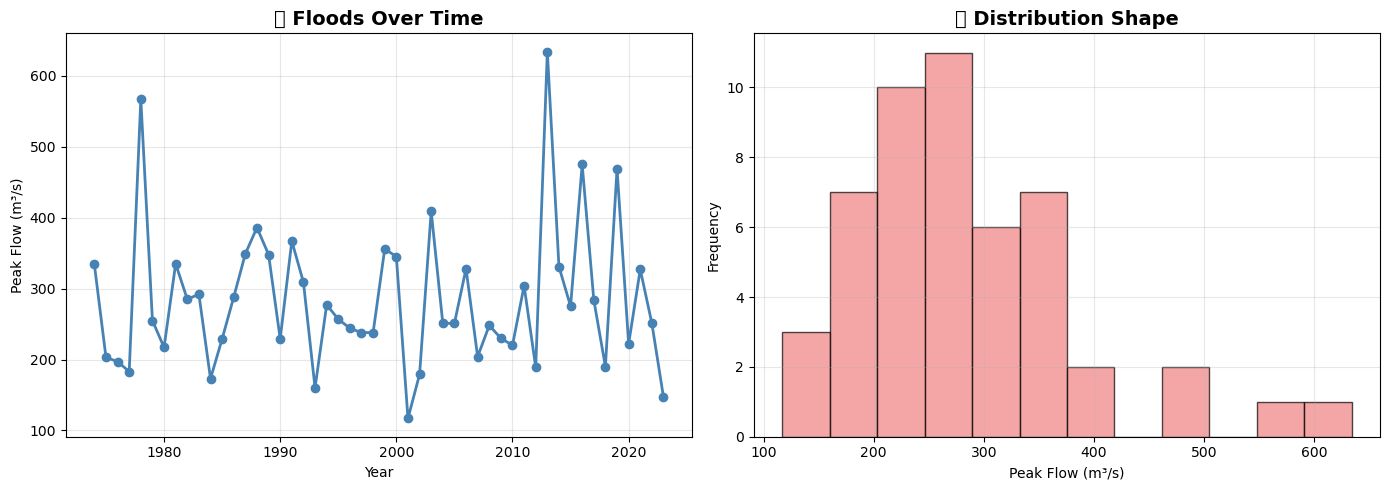

📊 Skewness: 1.32
✅ Right-skewed data - perfect for GEV analysis!


In [17]:
# Simple plot to see our data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Time series
ax1.plot(flood_data['Year'], flood_data['Peak_Flow'], 'o-', linewidth=2, markersize=6, color='steelblue')
ax1.set_title('🌊 Floods Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Peak Flow (m³/s)')
ax1.grid(True, alpha=0.3)

# Histogram
ax2.hist(flood_flows, bins=12, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('📊 Distribution Shape', fontsize=14, fontweight='bold')
ax2.set_xlabel('Peak Flow (m³/s)')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Quick stats
skewness = stats.skew(flood_flows)
print(f"📊 Skewness: {skewness:.2f}")
if skewness > 0.5:
    print("✅ Right-skewed data - perfect for GEV analysis!")
else:
    print("📊 Data is fairly symmetric")

---

# 🎯 Part 2: The Key Concept - Shape Parameter

## The Shape Parameter (ξ) Controls Everything!

**Simple rule:**
- **ξ > 0** 🔴 Heavy tail (extreme events more likely)
- **ξ = 0** 🔵 Medium tail (standard Gumbel)
- **ξ < 0** 🟢 Light tail (extreme events limited)

Let's see this in action!

In [18]:
# Show the three types of GEV
x = np.linspace(0, 15, 200)

# Create the three types
shapes = [0.3, 0.0, -0.3]  # Heavy, Medium, Light
names = ['🔴 Fréchet (Heavy)', '🔵 Gumbel (Medium)', '🟢 Weibull (Light)']
colors = ['red', 'blue', 'green']

fig = go.Figure()

for shape, name, color in zip(shapes, names, colors):
    try:
        if shape == 0:
            # Use Gumbel for ξ = 0
            pdf_vals = stats.gumbel_r.pdf(x, loc=5, scale=2)
        else:
            # Use GEV for ξ ≠ 0
            pdf_vals = stats.genextreme.pdf(x, -shape, loc=5, scale=2)
        
        fig.add_trace(go.Scatter(
            x=x, y=pdf_vals, mode='lines',
            name=f'{name} (ξ={shape:+.1f})',
            line=dict(color=color, width=4)
        ))
    except:
        pass

fig.update_layout(
    title='🎯 Three Types of GEV Distribution',
    xaxis_title='Flow (m³/s)',
    yaxis_title='Probability Density',
    height=500,
    font=dict(size=14)
)

fig.show()

print("👀 Notice the differences:")
print("🔴 Red (Heavy tail): Long tail extends far to the right")
print("🔵 Blue (Gumbel): Medium tail - your familiar shape")
print("🟢 Green (Light tail): Tail cuts off earlier")
print("\n💡 The shape parameter ξ determines which type you get!")

👀 Notice the differences:
🔴 Red (Heavy tail): Long tail extends far to the right
🔵 Blue (Gumbel): Medium tail - your familiar shape
🟢 Green (Light tail): Tail cuts off earlier

💡 The shape parameter ξ determines which type you get!


---

# ⚡ Part 3: Fit GEV to Our Flood Data

Now let's fit GEV to our real flood data and see what type we get!

In [19]:
# Step 1: Fit GEV distribution (super easy!)
print("🔧 Fitting GEV to our flood data...")

# This one line does all the complex math!
gev_params = stats.genextreme.fit(flood_flows)
shape_scipy, location, scale = gev_params

# Convert to standard convention
shape = -shape_scipy  # Convert scipy convention to hydrology convention

print("\n📊 Results:")
print(f"Shape (ξ): {shape:.4f}")
print(f"Location (μ): {location:.1f} m³/s")
print(f"Scale (σ): {scale:.1f} m³/s")

# Step 2: What type did we get?
print("\n🎯 What type is this?")
if shape > 0.05:
    gev_type = "🔴 Fréchet (Heavy Tail)"
    meaning = "Extreme floods more likely than Gumbel predicts"
    advice = "Use conservative design approach!"
    color = 'red'
elif shape < -0.05:
    gev_type = "🟢 Weibull (Light Tail)"
    meaning = "Extreme floods are naturally limited"
    advice = "Standard design procedures OK"
    color = 'green'
else:
    gev_type = "🔵 Gumbel-like (Medium Tail)"
    meaning = "Standard extreme behavior - like regular Gumbel"
    advice = "Either GEV or Gumbel will work fine"
    color = 'blue'

print(f"Type: {gev_type}")
print(f"Meaning: {meaning}")
print(f"Engineering advice: {advice}")

# Step 3: Visual check - does it fit our data?
fig = go.Figure()

# Plot our data as histogram
fig.add_trace(go.Histogram(
    x=flood_flows, nbinsx=12, histnorm='probability density',
    name='Our Flood Data', opacity=0.7, marker_color='lightblue'
))

# Plot fitted GEV
x_range = np.linspace(min(flood_flows)*0.8, max(flood_flows)*1.2, 200)
gev_pdf = stats.genextreme.pdf(x_range, *gev_params)

fig.add_trace(go.Scatter(
    x=x_range, y=gev_pdf, mode='lines',
    name='GEV Fit', line=dict(color=color, width=4)
))

fig.update_layout(
    title=f'🎯 GEV Fit: {gev_type}',
    xaxis_title='Peak Flow (m³/s)',
    yaxis_title='Probability Density',
    height=500
)

fig.show()

print("\n👀 How does it look?")
print("   The red line should follow the blue bars reasonably well")
print("   If it does, our GEV model is good to use! ✅")

🔧 Fitting GEV to our flood data...

📊 Results:
Shape (ξ): 0.0369
Location (μ): 238.5 m³/s
Scale (σ): 73.9 m³/s

🎯 What type is this?
Type: 🔵 Gumbel-like (Medium Tail)
Meaning: Standard extreme behavior - like regular Gumbel
Engineering advice: Either GEV or Gumbel will work fine



👀 How does it look?
   The red line should follow the blue bars reasonably well
   If it does, our GEV model is good to use! ✅


---

# 🆚 Part 4: Gumbel vs GEV Comparison

Let's compare **Gumbel** (what you know) vs **GEV** (the improved version) using our data!

In [20]:
# Fit both Gumbel and GEV to the same data
print("🔧 Fitting both distributions to our flood data...")

# Fit Gumbel (your familiar method)
gumbel_params = stats.gumbel_r.fit(flood_flows)
gumbel_loc, gumbel_scale = gumbel_params

# Fit GEV (the improved method) - already done above
# gev_params already calculated

print("\n📊 Parameter Comparison:")
print(f"Gumbel:  Location = {gumbel_loc:.1f}, Scale = {gumbel_scale:.1f}, Shape = 0 (fixed)")
print(f"GEV:     Location = {location:.1f}, Scale = {scale:.1f}, Shape = {shape:.3f} (flexible)")

# Visual comparison
fig = go.Figure()

# Our data
fig.add_trace(go.Histogram(
    x=flood_flows, nbinsx=12, histnorm='probability density',
    name='📊 Our Data', opacity=0.6, marker_color='lightgray'
))

# Gumbel fit
x_range = np.linspace(min(flood_flows)*0.8, max(flood_flows)*1.3, 200)
gumbel_pdf = stats.gumbel_r.pdf(x_range, *gumbel_params)
gev_pdf = stats.genextreme.pdf(x_range, *gev_params)

fig.add_trace(go.Scatter(
    x=x_range, y=gumbel_pdf, mode='lines',
    name='🔵 Gumbel', line=dict(color='blue', width=3)
))

fig.add_trace(go.Scatter(
    x=x_range, y=gev_pdf, mode='lines',
    name='🔴 GEV', line=dict(color='red', width=3)
))

fig.update_layout(
    title='🆚 Gumbel vs GEV: Which Fits Better?',
    xaxis_title='Peak Flow (m³/s)',
    yaxis_title='Probability Density',
    height=500
)

fig.show()

# Simple fit comparison
gumbel_ll = np.sum(stats.gumbel_r.logpdf(flood_flows, *gumbel_params))
gev_ll = np.sum(stats.genextreme.logpdf(flood_flows, *gev_params))

print("\n🏆 Which model is better?")
print(f"Gumbel fit quality: {gumbel_ll:.1f}")
print(f"GEV fit quality: {gev_ll:.1f}")

if gev_ll > gumbel_ll + 2:  # Significant improvement
    print("✅ GEV is clearly better! The flexibility helps.")
elif gev_ll > gumbel_ll:
    print("✅ GEV is slightly better, but both are reasonable")
else:
    print("📊 Both are similar - Gumbel is adequate")

print(f"\n💡 For this data, shape parameter = {shape:.3f}")
if abs(shape) > 0.1:
    print("   This is significantly different from Gumbel - GEV captures important pattern!")
else:
    print("   This is close to Gumbel - both methods give similar results")

🔧 Fitting both distributions to our flood data...

📊 Parameter Comparison:
Gumbel:  Location = 240.0, Scale = 74.8, Shape = 0 (fixed)
GEV:     Location = 238.5, Scale = 73.9, Shape = 0.037 (flexible)



🏆 Which model is better?
Gumbel fit quality: -295.1
GEV fit quality: -295.0
✅ GEV is slightly better, but both are reasonable

💡 For this data, shape parameter = 0.037
   This is close to Gumbel - both methods give similar results


---

# 🏗️ Part 5: Engineering Applications

## Calculate Design Events

This is the **most important part** for engineers - calculating the flood magnitudes for design!

In [21]:
# Calculate design events for both Gumbel and GEV
print("🎯 DESIGN EVENT COMPARISON")
print("=" * 50)

# Standard return periods
return_periods = [5, 10, 25, 50, 100]

print(f"{'Return Period':<12} {'Gumbel':<10} {'GEV':<10} {'Difference':<12}")
print("-" * 50)

results = []
for T in return_periods:
    prob = 1 - 1/T  # Non-exceedance probability
    
    # Calculate design values
    gumbel_value = stats.gumbel_r.ppf(prob, *gumbel_params)
    gev_value = stats.genextreme.ppf(prob, *gev_params)
    difference = gev_value - gumbel_value
    
    results.append({
        'T': T,
        'Gumbel': gumbel_value,
        'GEV': gev_value,
        'Diff': difference
    })
    
    print(f"{T:>6} years    {gumbel_value:>6.0f}     {gev_value:>6.0f}     {difference:>+7.0f} m³/s")

print("-" * 50)

# Engineering interpretation
max_diff_percent = max([abs(r['Diff']/r['Gumbel']*100) for r in results])
print(f"\n📊 Maximum difference: {max_diff_percent:.1f}%")

if max_diff_percent > 15:
    print("⚠️  SIGNIFICANT DIFFERENCES! GEV analysis is important for this data.")
    print("   Using wrong distribution could lead to unsafe or uneconomical design.")
elif max_diff_percent > 5:
    print("📊 Moderate differences - GEV provides improved accuracy")
else:
    print("✅ Small differences - either method is reasonable")

# Show specific engineering applications
print("\n🏗️  ENGINEERING APPLICATIONS:")
applications = [
    ("🏠 Residential culvert", 10),
    ("🏢 Commercial bridge", 50), 
    ("🏥 Hospital drainage", 100)
]

for facility, T in applications:
    gumbel_val = stats.gumbel_r.ppf(1-1/T, *gumbel_params)
    gev_val = stats.genextreme.ppf(1-1/T, *gev_params)
    diff = gev_val - gumbel_val
    
    print(f"{facility:<25}: Gumbel = {gumbel_val:.0f}, GEV = {gev_val:.0f} ({diff:+.0f}) m³/s")

🎯 DESIGN EVENT COMPARISON
Return Period Gumbel     GEV        Difference  
--------------------------------------------------
     5 years       352        352          +0 m³/s
    10 years       408        412          +4 m³/s
    25 years       479        489         +10 m³/s
    50 years       532        549         +17 m³/s
   100 years       584        609         +25 m³/s
--------------------------------------------------

📊 Maximum difference: 4.3%
✅ Small differences - either method is reasonable

🏗️  ENGINEERING APPLICATIONS:
🏠 Residential culvert    : Gumbel = 408, GEV = 412 (+4) m³/s
🏢 Commercial bridge      : Gumbel = 532, GEV = 549 (+17) m³/s
🏥 Hospital drainage      : Gumbel = 584, GEV = 609 (+25) m³/s


## 📊 Visual Comparison of Design Events

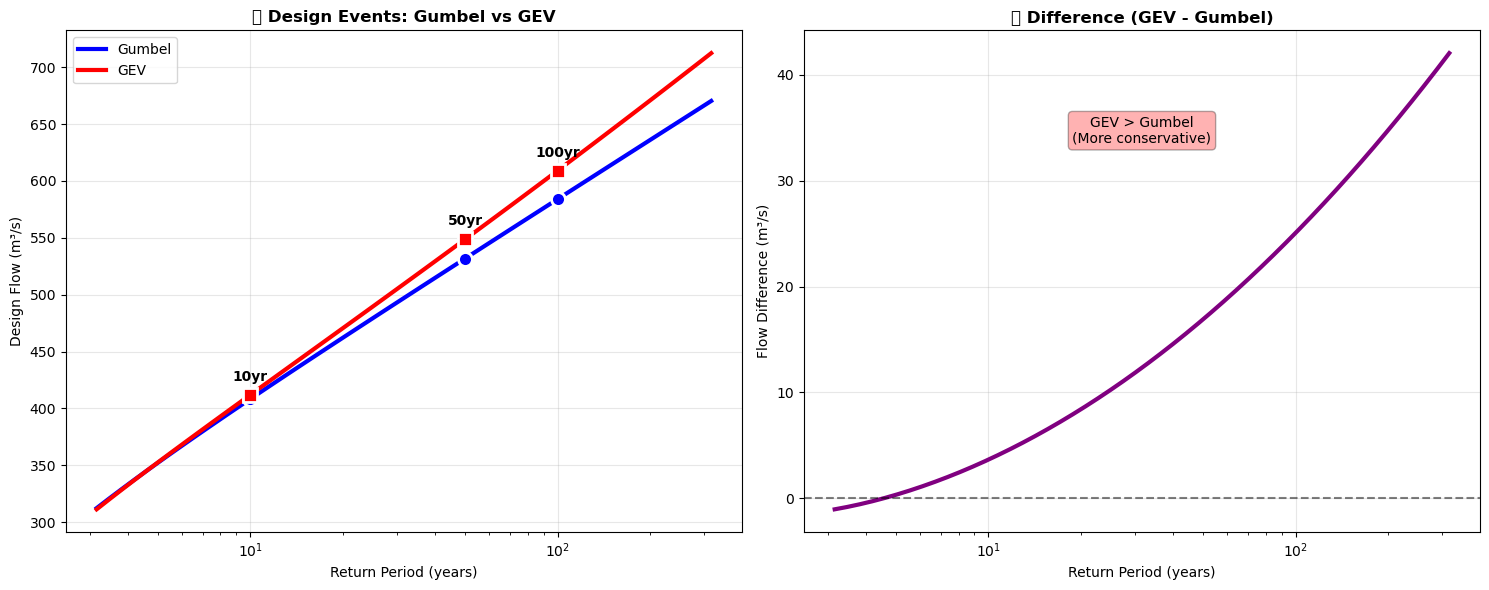


📋 SUMMARY TABLE:
Return Period   Gumbel      GEV Difference % Difference
      5 years 352 m³/s 352 m³/s    +0 m³/s        +0.1%
     10 years 408 m³/s 412 m³/s    +4 m³/s        +0.9%
     25 years 479 m³/s 489 m³/s   +10 m³/s        +2.1%
     50 years 532 m³/s 549 m³/s   +17 m³/s        +3.2%
    100 years 584 m³/s 609 m³/s   +25 m³/s        +4.3%


In [22]:
# Create side-by-side comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Return period plot
T_range = np.logspace(0.5, 2.5, 50)  # 3 to 300 years
prob_range = 1 - 1/T_range

gumbel_design = stats.gumbel_r.ppf(prob_range, *gumbel_params)
gev_design = stats.genextreme.ppf(prob_range, *gev_params)

ax1.semilogx(T_range, gumbel_design, '-', linewidth=3, color='blue', label='Gumbel')
ax1.semilogx(T_range, gev_design, '-', linewidth=3, color='red', label='GEV')

# Mark key design events
for T in [10, 50, 100]:
    gumbel_val = stats.gumbel_r.ppf(1-1/T, *gumbel_params)
    gev_val = stats.genextreme.ppf(1-1/T, *gev_params)
    
    ax1.plot(T, gumbel_val, 'o', markersize=10, color='blue', markeredgecolor='white', markeredgewidth=2)
    ax1.plot(T, gev_val, 's', markersize=10, color='red', markeredgecolor='white', markeredgewidth=2)
    
    # Add labels
    ax1.annotate(f'{T}yr', xy=(T, max(gumbel_val, gev_val)), xytext=(0, 10),
                textcoords='offset points', ha='center', fontweight='bold')

ax1.set_title('🎯 Design Events: Gumbel vs GEV', fontweight='bold')
ax1.set_xlabel('Return Period (years)')
ax1.set_ylabel('Design Flow (m³/s)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Difference plot
differences = gev_design - gumbel_design
ax2.semilogx(T_range, differences, '-', linewidth=3, color='purple')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

ax2.set_title('📊 Difference (GEV - Gumbel)', fontweight='bold')
ax2.set_xlabel('Return Period (years)')
ax2.set_ylabel('Flow Difference (m³/s)')
ax2.grid(True, alpha=0.3)

# Add interpretation
if np.mean(differences) > 10:
    ax2.text(0.5, 0.8, 'GEV > Gumbel\n(More conservative)', 
             transform=ax2.transAxes, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.3))
elif np.mean(differences) < -10:
    ax2.text(0.5, 0.8, 'GEV < Gumbel\n(Less conservative)', 
             transform=ax2.transAxes, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.3))
else:
    ax2.text(0.5, 0.8, 'Similar Results\n(Both OK)', 
             transform=ax2.transAxes, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='blue', alpha=0.3))

plt.tight_layout()
plt.show()

# Summary table
print("\n📋 SUMMARY TABLE:")
summary_data = []
for r in results:
    summary_data.append({
        'Return Period': f"{r['T']} years",
        'Gumbel': f"{r['Gumbel']:.0f} m³/s",
        'GEV': f"{r['GEV']:.0f} m³/s",
        'Difference': f"{r['Diff']:+.0f} m³/s",
        '% Difference': f"{r['Diff']/r['Gumbel']*100:+.1f}%"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

---

# 🎯 Part 6: Engineering Decision Making

## When Should You Use GEV vs Gumbel?

Here's a **practical guide** for real engineering projects:

In [23]:
# Decision making tool
print("🤔 WHEN TO USE GEV vs GUMBEL")
print("=" * 60)

# Analyze our specific case
shape_magnitude = abs(shape)
max_design_diff = max([abs(r['Diff']/r['Gumbel']*100) for r in results])

print(f"\nYOUR DATA ANALYSIS:")
print(f"• Shape parameter magnitude: {shape_magnitude:.3f}")
print(f"• Maximum design difference: {max_design_diff:.1f}%")
print(f"• Distribution type: {gev_type}")

print(f"\n📊 RECOMMENDATION FOR YOUR DATA:")

if shape_magnitude > 0.15 or max_design_diff > 15:
    recommendation = "🔴 USE GEV"
    reason = "Significant departure from Gumbel - accuracy matters"
    risk_level = "High"
elif shape_magnitude > 0.05 or max_design_diff > 5:
    recommendation = "🟡 PREFER GEV"
    reason = "Moderate improvement over Gumbel - worth the extra effort"
    risk_level = "Medium"
else:
    recommendation = "🟢 EITHER OK"
    reason = "Similar results - choose based on other factors"
    risk_level = "Low"

print(f"   {recommendation}")
print(f"   Reason: {reason}")
print(f"   Accuracy improvement: {risk_level}")

# General decision framework
print("\n🎯 GENERAL DECISION FRAMEWORK:")
print()
print("USE GEV WHEN:")
gev_cases = [
    "🏥 Critical infrastructure (hospitals, dams)",
    "📏 Long return periods (100+ years)", 
    "📊 Data shows heavy skewness",
    "💰 High economic consequences",
    "📋 Professional standards require it"
]
for case in gev_cases:
    print(f"   ✅ {case}")

print("\nGUMBEL STILL OK WHEN:")
gumbel_cases = [
    "🏠 Standard infrastructure (small culverts)",
    "⚡ Quick preliminary analysis",
    "📊 Data fits Gumbel reasonably well",
    "⏰ Time/resource constraints",
    "📚 Educational or comparative purposes"
]
for case in gumbel_cases:
    print(f"   ✅ {case}")

print(f"\n💡 BOTTOM LINE: GEV is more accurate, Gumbel is simpler.")
print(f"   Choose based on your project's needs and importance!")

🤔 WHEN TO USE GEV vs GUMBEL

YOUR DATA ANALYSIS:
• Shape parameter magnitude: 0.037
• Maximum design difference: 4.3%
• Distribution type: 🔵 Gumbel-like (Medium Tail)

📊 RECOMMENDATION FOR YOUR DATA:
   🟢 EITHER OK
   Reason: Similar results - choose based on other factors
   Accuracy improvement: Low

🎯 GENERAL DECISION FRAMEWORK:

USE GEV WHEN:
   ✅ 🏥 Critical infrastructure (hospitals, dams)
   ✅ 📏 Long return periods (100+ years)
   ✅ 📊 Data shows heavy skewness
   ✅ 💰 High economic consequences
   ✅ 📋 Professional standards require it

GUMBEL STILL OK WHEN:
   ✅ 🏠 Standard infrastructure (small culverts)
   ✅ ⚡ Quick preliminary analysis
   ✅ 📊 Data fits Gumbel reasonably well
   ✅ ⏰ Time/resource constraints
   ✅ 📚 Educational or comparative purposes

💡 BOTTOM LINE: GEV is more accurate, Gumbel is simpler.
   Choose based on your project's needs and importance!


## 🏗️ Real Engineering Example

Let's solve a **real problem** using our GEV analysis!

In [24]:
# Engineering case study
print("🌉 ENGINEERING CASE STUDY")
print("=" * 50)
print("Problem: Design a bridge for 50-year service life")
print("Question: What design flood should we use?")
print("=" * 50)

# Consider different design options
design_options = [25, 50, 100]
service_life = 50

print(f"\nDESIGN OPTIONS ANALYSIS (for {service_life}-year bridge life):")
print(f"{'Design T':<10} {'GEV Flow':<12} {'Lifetime Risk':<15} {'Recommendation':<20}")
print("-" * 65)

for T in design_options:
    # Calculate design flow using GEV
    design_flow = stats.genextreme.ppf(1-1/T, *gev_params)
    
    # Calculate lifetime risk
    annual_risk = 1/T
    lifetime_risk = 1 - (1 - annual_risk)**service_life
    
    # Engineering recommendation
    if lifetime_risk < 0.2:
        rec = "✅ Conservative"
    elif lifetime_risk < 0.4:
        rec = "✅ Acceptable"
    elif lifetime_risk < 0.6:
        rec = "⚠️  Moderate risk"
    else:
        rec = "❌ High risk"
    
    print(f"{T:>6} years   {design_flow:>8.0f} m³/s    {lifetime_risk:>10.1%}        {rec:<20}")

print("-" * 65)

# Make recommendation based on GEV analysis
recommended_T = 50  # Standard for bridges
recommended_flow = stats.genextreme.ppf(1-1/recommended_T, *gev_params)
recommended_risk = 1 - (1 - 1/recommended_T)**service_life

print(f"\n🎯 ENGINEERING RECOMMENDATION:")
print(f"   Design Event: {recommended_T}-year flood")
print(f"   Design Flow: {recommended_flow:.0f} m³/s")
print(f"   {service_life}-year Risk: {recommended_risk:.1%}")
print(f"   Status: Acceptable for bridge infrastructure")

# Show impact of GEV vs Gumbel choice
gumbel_flow = stats.gumbel_r.ppf(1-1/recommended_T, *gumbel_params)
flow_difference = recommended_flow - gumbel_flow

print(f"\n⚖️  GEV vs GUMBEL IMPACT:")
print(f"   GEV design: {recommended_flow:.0f} m³/s")
print(f"   Gumbel design: {gumbel_flow:.0f} m³/s")
print(f"   Difference: {flow_difference:+.0f} m³/s ({flow_difference/gumbel_flow*100:+.1f}%)")

if abs(flow_difference) > 20:
    print(f"   💡 Significant difference - GEV analysis was important!")
else:
    print(f"   💡 Small difference - either method would work")

print(f"\n✅ Case study complete! You now know how to apply GEV to real problems.")

🌉 ENGINEERING CASE STUDY
Problem: Design a bridge for 50-year service life
Question: What design flood should we use?

DESIGN OPTIONS ANALYSIS (for 50-year bridge life):
Design T   GEV Flow     Lifetime Risk   Recommendation      
-----------------------------------------------------------------
    25 years        489 m³/s         87.0%        ❌ High risk         
    50 years        549 m³/s         63.6%        ❌ High risk         
   100 years        609 m³/s         39.5%        ✅ Acceptable        
-----------------------------------------------------------------

🎯 ENGINEERING RECOMMENDATION:
   Design Event: 50-year flood
   Design Flow: 549 m³/s
   50-year Risk: 63.6%
   Status: Acceptable for bridge infrastructure

⚖️  GEV vs GUMBEL IMPACT:
   GEV design: 549 m³/s
   Gumbel design: 532 m³/s
   Difference: +17 m³/s (+3.2%)
   💡 Small difference - either method would work

✅ Case study complete! You now know how to apply GEV to real problems.


---

# 📊 Part 7: Export Your Results

Create professional outputs for your engineering reports!

In [25]:
# Create summary for your engineering report
print("📋 CREATING PROFESSIONAL SUMMARY...")

# Summary table for reports
report_data = []
for r in results:
    report_data.append({
        'Return Period (years)': r['T'],
        'Annual Risk (%)': f"{100/r['T']:.2f}",
        'Gumbel Design (m³/s)': f"{r['Gumbel']:.0f}",
        'GEV Design (m³/s)': f"{r['GEV']:.0f}",
        'Difference (m³/s)': f"{r['Diff']:+.0f}",
        'Engineering Application': [
            'Minor drainage',
            'Residential infrastructure', 
            'Commercial infrastructure',
            'Important bridges',
            'Critical facilities'
        ][return_periods.index(r['T'])]
    })

report_df = pd.DataFrame(report_data)
print("\n📊 ENGINEERING DESIGN TABLE:")
print(report_df.to_string(index=False))

# Model parameters summary
print(f"\n🎯 GEV MODEL PARAMETERS:")
print(f"   Shape (ξ): {shape:.4f} → {gev_type}")
print(f"   Location (μ): {location:.1f} m³/s")
print(f"   Scale (σ): {scale:.1f} m³/s")

# Engineering conclusions
print(f"\n🏗️  ENGINEERING CONCLUSIONS:")
print(f"   • Dataset: {len(flood_flows)} years of annual maximum floods")
print(f"   • GEV type: {gev_type.split()[1]} - {meaning}")
print(f"   • Recommendation: {advice}")
print(f"   • Key finding: {recommendation.split()[1]} for this dataset")

# Try to save to Excel
try:
    # Create Excel file with results
    with pd.ExcelWriter('GEV_Analysis_Simple.xlsx') as writer:
        flood_data.to_excel(writer, sheet_name='Original_Data', index=False)
        report_df.to_excel(writer, sheet_name='Design_Events', index=False)
        
        # Parameters sheet
        params_df = pd.DataFrame({
            'Parameter': ['Shape (ξ)', 'Location (μ)', 'Scale (σ)'],
            'Value': [shape, location, scale],
            'Meaning': [
                f'Controls tail behavior - {gev_type}',
                'Central location of distribution',
                'Spread/variability of distribution'
            ]
        })
        params_df.to_excel(writer, sheet_name='GEV_Parameters', index=False)
    
    print("\n✅ Results saved to 'GEV_Analysis_Simple.xlsx'")
    print("   📁 Contains: Original data, Design events, GEV parameters")
    
except:
    print("\n📋 Excel export not available - but you have all results above!")
    print("   💡 Copy the tables above to create your own Excel file")

print("\n🎉 Analysis complete! You're ready to use GEV in real projects.")

📋 CREATING PROFESSIONAL SUMMARY...

📊 ENGINEERING DESIGN TABLE:
 Return Period (years) Annual Risk (%) Gumbel Design (m³/s) GEV Design (m³/s) Difference (m³/s)    Engineering Application
                     5           20.00                  352               352                +0             Minor drainage
                    10           10.00                  408               412                +4 Residential infrastructure
                    25            4.00                  479               489               +10  Commercial infrastructure
                    50            2.00                  532               549               +17          Important bridges
                   100            1.00                  584               609               +25        Critical facilities

🎯 GEV MODEL PARAMETERS:
   Shape (ξ): 0.0369 → 🔵 Gumbel-like (Medium Tail)
   Location (μ): 238.5 m³/s
   Scale (σ): 73.9 m³/s

🏗️  ENGINEERING CONCLUSIONS:
   • Dataset: 50 years of annual maximum

---

# 🎓 Summary: What You Learned

## 🏆 Congratulations! You now understand GEV analysis!

### 🔑 **Key Concepts You Mastered:**

1. **🔧 GEV = Flexible Gumbel**
   - Same idea as Gumbel, but can adjust shape
   - One extra parameter (ξ) gives this flexibility

2. **🎛️ Shape Parameter Controls Everything**
   - ξ > 0: Heavy tail (more extreme events)
   - ξ = 0: Medium tail (standard Gumbel)
   - ξ < 0: Light tail (limited extremes)

3. **⚖️ When to Use Which Method**
   - **Critical projects**: Use GEV for accuracy
   - **Standard projects**: Gumbel often sufficient
   - **Decision**: Based on consequences and data characteristics

4. **💻 Python Implementation**
   - `stats.genextreme.fit()` - fits GEV
   - `stats.genextreme.ppf()` - calculates design events
   - Compare with Gumbel using `stats.gumbel_r`

---

## 🚀 **Next Steps:**

### **For Your Projects:**
- Apply this to your capstone project data
- Try with different types of extreme data (rainfall, wind, etc.)
- Practice with local flood data from USGS

### **For Professional Development:**
- Learn about non-stationary GEV (climate change effects)
- Explore confidence intervals and uncertainty
- Study regulatory standards (Bulletin 17C, etc.)

### **Advanced Topics (If Interested):**
- Regional frequency analysis
- Multivariate extreme values
- Bayesian parameter estimation

---

## 📝 **Quick Reference:**

```python
# The essential GEV workflow:
import scipy.stats as stats

# 1. Fit GEV
gev_params = stats.genextreme.fit(your_data)
shape, location, scale = gev_params

# 2. Check shape parameter
xi = -shape  # Convert to hydrology convention
if xi > 0: print("Heavy tail - be conservative")
elif xi < 0: print("Light tail - bounded extremes")
else: print("Gumbel-like behavior")

# 3. Calculate design events
design_100yr = stats.genextreme.ppf(0.99, *gev_params)
print(f"100-year event: {design_100yr:.0f}")
```

---

## 🎉 **You Did It!**

You now understand **GEV analysis** - a powerful tool for extreme value analysis in water resources engineering!

**Remember:** 
- GEV is just Gumbel with adjustable shape
- The shape parameter ξ is the key difference
- Use GEV when accuracy matters for extreme events
- Always check if the extra complexity is worth it for your project

**🌊 Good luck with your water resources engineering projects! 🌊**

---

*Questions? Ask your instructor or TA! 📧*